#Atividade Bim. Data Science - Aprendizado não supervisionado parte 1


Aluno: Matheus Zalamena e Souza  
RGM: 12948128

Inicializando o Drive e fazendo imports:

In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Trab Bimestral Data Science/df_perfilodonto_limpo.csv', sep=',', encoding='latin-1')

In [4]:
df.head()

,Data_Atend,Data_Nasc,Sexo,Tipo_Unidade,Desc_Unidade,Desc_Procedimento,Desc_Prof,Exames,Qtd_Medic_Prescritos,Area_Atuacao,...,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Dest_Fezes/Urina,Qtd_Comodos,Meio_Comunic,Meio_Transp,Municipio,Bairro,Nacionalidade
0,2022-01-03,1973-04-10,F,ODONTOLOGICO,UPA SITIO CERCADO,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),CIRURGIAO DENTISTA,Nao,0,NÃ£o informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
1,2022-01-03,1973-04-10,F,ODONTOLOGICO,UPA SITIO CERCADO,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA,Nao,0,NÃ£o informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
2,2022-01-03,1996-01-19,M,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO COMUM OU DE URGENCIA,CIRURGIAO DENTISTA,Nao,0,NÃ£o informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira
3,2022-01-03,1984-08-26,F,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO COMUM OU DE URGENCIA,CIRURGIAO DENTISTA,Nao,0,NÃ£o informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira
4,2022-01-03,1997-04-29,F,ODONTOLOGICO,UPA SITIO CERCADO,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,CIRURGIAO DENTISTA,Nao,16,NÃ£o informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,4,TELEVISAO,ONIBUS,CURITIBA,BOQUEIRAO,Brasileira


Removendo algumas colunas com muito conteúdo:

In [5]:
col_removidas = [
'Data_Atend', 'Data_Nasc', 'Desc_Unidade', 'Desc_Procedimento', 'Area_Atuacao', 'Meio_Comunic', 'Meio_Transp', 'Bairro', 'Nacionalidade', 'Municipio', "Dest_Fezes/Urina"	
]

df = df.drop(columns = col_removidas)

In [6]:
df.head()

,Sexo,Tipo_Unidade,Desc_Prof,Exames,Qtd_Medic_Prescritos,Causou_Internamento,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Qtd_Comodos
0,F,ODONTOLOGICO,CIRURGIAO DENTISTA,Nao,0,Nao,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,3
1,F,ODONTOLOGICO,CIRURGIAO DENTISTA,Nao,0,Nao,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,3
2,M,ODONTOLOGICO,CIRURGIAO DENTISTA,Nao,0,Nao,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,5
3,F,ODONTOLOGICO,CIRURGIAO DENTISTA,Nao,0,Nao,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,5
4,F,ODONTOLOGICO,CIRURGIAO DENTISTA,Nao,16,Nao,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,4


Utilizando replace para transformar varíaveis categóricas em numéricas

In [7]:
df['Sexo'].replace({'F': 0, 'M': 1}, inplace=True)

In [8]:
df['Tipo_Unidade'].replace({'ODONTOLOGICO': 0, 'BASICO': 1, 'CENTRO DE ESPECIALIDADES ODONTOLOGICAS': 2}, inplace=True)

In [9]:
df['Desc_Prof'].replace({'CIRURGIAO DENTISTA': 0, 'TECNICO EM SAUDE BUCAL': 1, 'AUXILIAR EM SAUDE BUCAL': 2}, inplace=True)

In [10]:
df['Exames'].replace({'Nao': 0, 'Sim': 1}, inplace=True)

In [11]:
df['Causou_Internamento'].replace({'Nao': 0, 'Sim': 1}, inplace=True)

In [12]:
df['Energia_Eletrica'].replace({'Nao': 0, 'Sim': 1}, inplace=True)

In [13]:
df['Tipo_Habitacao'].replace({'TIJOLO/ALVENARIA COM REVESTIMENTO': 0, 'MADEIRA': 1, 'TIJOLO ALVENARIA SEM REVESTIMENTO': 2, 'OUTRO MATERIAL': 3, 'PALHA ': 4, 'TAIPA COM REVESTIMENTO' : 5, 'TAIPA SEM REVESTIMENTO' : 6}, inplace=True)

In [14]:
df['Destino_Lixo'].replace({'COLETADO': 0, 'OUTROS': 1, 'CÃ\x89U ABERTO': 2, 'QUEIMADO/ENTERRADO': 3 }, inplace=True)

In [15]:
df.dtypes

Sexo                    int64
Tipo_Unidade            int64
Desc_Prof               int64
Exames                  int64
Qtd_Medic_Prescritos    int64
Causou_Internamento     int64
Energia_Eletrica        int64
Tipo_Habitacao          int64
Destino_Lixo            int64
Qtd_Comodos             int64
dtype: object

In [16]:
df.head()

,Sexo,Tipo_Unidade,Desc_Prof,Exames,Qtd_Medic_Prescritos,Causou_Internamento,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Qtd_Comodos
0,0,0,0,0,0,0,1,0,0,3
1,0,0,0,0,0,0,1,0,0,3
2,1,0,0,0,0,0,1,0,0,5
3,0,0,0,0,0,0,1,0,0,5
4,0,0,0,0,16,0,1,0,0,4


#Análise PCA:

In [17]:
pca = PCA(n_components=2)

In [18]:
pca_transform = pca.fit_transform(df)

In [19]:
pca_transform.shape

(234040, 2)

Exibindo componentes principais

In [20]:
pca_transform

array([[-14.55272522,  -2.3655523 ],
       [-14.55272522,  -2.3655523 ],
       [-14.55350063,  -0.36520865],
       ...,
       [-14.55375392,  -0.36500259],
       [-14.5549165 ,   2.63499654],
       [-14.55452897,   1.63499683]])

In [21]:
#Razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.9838414 , 0.01601789])

In [22]:
#Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.9998592957291003

In [23]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(pca_transform, labels=labels,
    dimensions=range(2), #Numero componentes PCA por Sexo (PCA(n_components=2))
    color=df["Sexo"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#Escalonamento

In [24]:
df_reduzido = df.loc[0:250]

Criando escala utilizando o StandartScaler

In [25]:
escala = StandardScaler()
df_escalonamento = escala.fit_transform(df_reduzido)
df_escalonamento

array([[-0.72195022,  0.        , -0.20370021, ..., -0.38926478,
         0.        , -1.58775672],
       [-0.72195022,  0.        , -0.20370021, ..., -0.38926478,
         0.        , -1.58775672],
       [ 1.38513705,  0.        , -0.20370021, ..., -0.38926478,
         0.        ,  0.1300318 ],
       ...,
       [-0.72195022,  0.        , -0.20370021, ..., -0.38926478,
         0.        , -0.72886246],
       [ 1.38513705,  0.        , -0.20370021, ..., -0.38926478,
         0.        ,  0.1300318 ],
       [ 1.38513705,  0.        , -0.20370021, ..., -0.38926478,
         0.        ,  0.1300318 ]])

In [26]:
df_escalonamento.shape

(251, 10)

#K Means com PCA

##Utilizando K Means com o Elbow Method

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(pca_transform)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



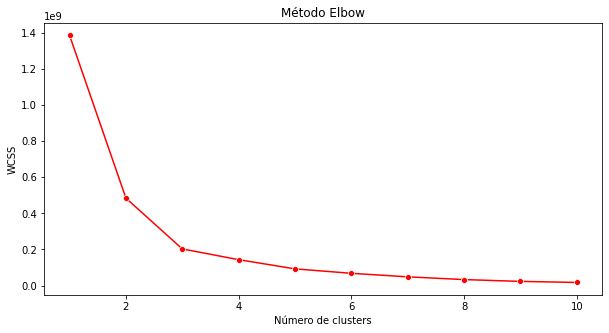

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

##Agrupamento

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [30]:
kmeans_fit = kmeans.fit(pca_transform)

In [37]:
#Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[-1.20393114e+01,  1.65392495e-02],
       [ 1.22554447e+04,  4.39020515e+00],
       [ 7.61565271e+01, -1.58304286e-01],
       [ 2.13058519e+02, -6.56430787e-02]])

In [38]:
# Classificações
classificacaodados = kmeans_fit.labels_
classificacaodados

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
graf1 = px.scatter(x = pca_transform[:,0], y = pca_transform[:,1], color=classificacaodados)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

Output hidden; open in https://colab.research.google.com to view.